In [2]:
"""
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle
"""

'\nCreated on Thur Sep  14 00:25:54 2023\n@author: Fernandez, Maria Giselle\n'

In [3]:
# Required Libraries: Import the libraries essential for plotting and numerical operations.
import matplotlib.pyplot as plt
import numpy as np

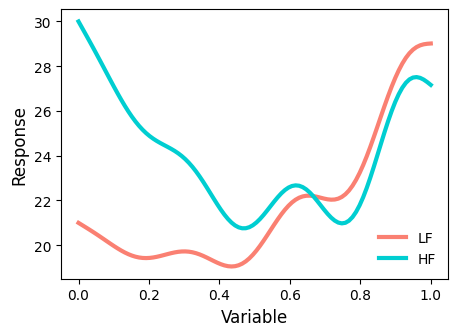

In [4]:
# Define the High-Fidelity function (HF)
def func_HF(x):
    return 2*x*np.sin(20*x+2) + 10*np.exp(x) + 20*(x-1)**2

# Define the Low-Fidelity function (LF)
def func_LF(x):
    return 1.4*x*np.sin(20*x + 2) + 7*np.exp(x) + 14*(x - 1)**2 + 10*x

# Lower and upper bounds for function evaluations
lb = 0
ub = 1

# Generate an array of 100 points, linearly spaced between the lower and upper bounds
x = np.linspace(lb, ub, 100)

# Evaluate the High-Fidelity function (HF) at these points
fHF = func_HF(x)

# Evaluate the Low-Fidelity function (LF) at these points
fLF = func_LF(x)

# Initialize the figure for plotting
plt.figure(figsize=[5, 3.5])

# Plot the Low-Fidelity function (LF)
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')

# Plot the High-Fidelity function (HF)
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Configure plot parameters
#plt.xlim([0, 1])
#plt.ylim([18, 30])
plt.legend(frameon=False)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Save the plot as a high-resolution PNG file
plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)


In [5]:
model_add = np.poly1d(np.polyfit(x_sampHF, func_HF(x_sampHF)-func_LF(x_sampHF), deg=2, rcond=None, full=False, w=None, cov=False))
model_mult = np.poly1d(np.polyfit(x_sampHF, func_HF(x_sampHF)/func_LF(x_sampHF), deg=2, rcond=None, full=False, w=None, cov=False))

In [6]:
def func_add(x):
    return model_add(x) + func_LF(x)

def func_mult(x):
    return model_mult(x) * func_LF(x)

In [7]:
np.random.seed(1)
x_add_mult = np.random.random(200)+1
y_add = func_add(x_add_mult) 
y_mult = func_mult(x_add_mult) 



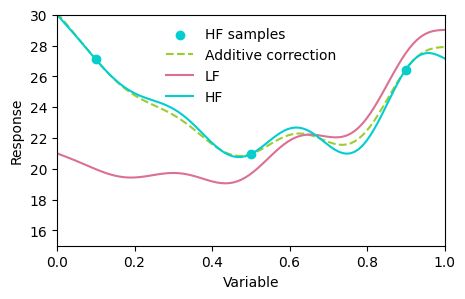

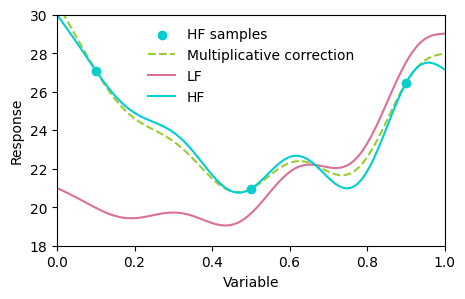

In [15]:
#plt.figure(figsize=[10,3])
plt.figure(figsize=[5,3])
plt.scatter(x_sampHF,func_HF(x_sampHF),c='darkturquoise',label='HF samples')
#plt.scatter(x_sampHF,func_LF(x_sampHF),label='LF samples')
plt.plot(x,func_add(x),'--',c='yellowgreen',label='Additive correction')
plt.plot(x,fLF,c='palevioletred',label='LF')
plt.plot(x,fHF,c='darkturquoise',label='HF')
plt.xlim([0,1])
plt.legend(frameon=False)
plt.xlabel('Variable')
plt.ylabel('Response')
plt.ylim([15,30])
plt.savefig('Add.png',dpi=1000, bbox_inches='tight', transparent=True)
plt.figure(figsize=[5,3])
plt.scatter(x_sampHF,func_HF(x_sampHF),c='darkturquoise',label='HF samples')
#plt.scatter(x_sampHF,func_LF(x_sampHF),label='LF samples')
plt.plot(x,func_mult(x),'--',c='yellowgreen',label='Multiplicative correction')
plt.plot(x,fLF,c='palevioletred',label='LF')
plt.plot(x,fHF,c='darkturquoise',label='HF')
plt.xlabel('Variable')
plt.ylabel('Response')
plt.xlim([0,1])
plt.ylim([18,30])
plt.legend(frameon=False)
plt.savefig('Mult.png',dpi=1000, bbox_inches='tight', transparent=True)

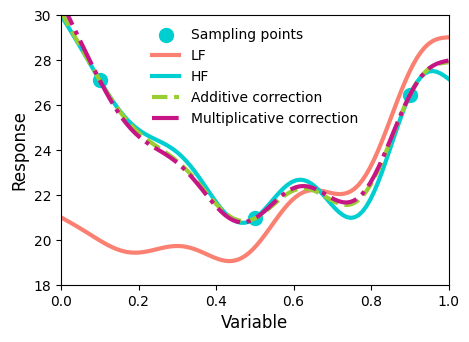

In [21]:
#plt.figure(figsize=[10,3])
plt.figure(figsize=[5,3.5])
#plt.scatter(x_sampHF,func_LF(x_sampHF),label='LF samples')
plt.scatter(x_sampHF,func_HF(x_sampHF),100,c='darkturquoise',label='Sampling points')
plt.plot(x,fLF,c='salmon',linewidth=3,label='LF')
plt.plot(x,fHF,c='darkturquoise',linewidth=3,label='HF')
plt.plot(x,func_add(x),'--',c='yellowgreen',linewidth=3,label='Additive correction')
plt.plot(x,func_mult(x),'-.',c='mediumvioletred',linewidth=3,label='Multiplicative correction')
plt.xlim([0,1])
plt.legend(frameon=False, fontsize=10)
plt.xlabel('Variable',fontsize=12)
plt.ylabel('Response',fontsize=12)
plt.ylim([18,30])
plt.savefig('AddMult.png',dpi=1000, bbox_inches='tight', transparent=True)